In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [31]:
f"Conjunto de entrenamiento: {x_train.shape} y {y_train.shape}" \
f" y validación: {x_test.shape} y {y_test.shape}"

'Conjunto de entrenamiento: (60000, 28, 28) y (60000,) y validación: (10000, 28, 28) y (10000,)'

In [3]:
model = models.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax'),
])
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)

/Users/asaucedov/anaconda3/envs/python_3_12_3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.8933 - loss: 0.3399
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9846 - loss: 0.0498
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9889 - loss: 0.0338
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9921 - loss: 0.0245
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9941 - loss: 0.0190


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
f"Loss {test_loss}, Accuracy {test_acc}"

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9847 - loss: 0.0491


'Loss 0.03965786099433899, Accuracy 0.988099992275238'

In [7]:
train_predictions = model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step


In [8]:
# which predictions are different from valid values
train_predictions_labels = np.argmax(train_predictions, axis=1)
train_predictions_labels

array([5, 0, 4, ..., 5, 6, 8])

In [51]:
incorrect_indices = np.where(train_predictions_labels != y_train)[0]
print(f"Predicciones incorrectas: {len(incorrect_indices)} ({(len(incorrect_indices)/len(x_train)*100):.2f} %)")
print(f"Predicciones incorrectas (indices): {incorrect_indices}")

Predicciones incorrectas: 341 (0.57 %)
Predicciones incorrectas (indices): [  132   212   370   418   482   494   720   788   902  1127  1404  1674
  2000  2044  2148  2438  2600  2676  2720  3220  3662  3692  3907  4158
  4280  4476  4529  5298  5430  5659  5718  5740  6130  6197  6221  6269
  6347  6399  6418  6610  6636  6707  6713  6885  7010  7080  7184  7264
  7528  7922  8202  8339  8347  8480  8558  8666  8883  8966  9075  9097
  9104  9235  9450  9504  9690 10205 10239 10241 10780 10944 10994 11245
 11829 12000 12076 12884 13194 14008 14062 14078 14246 14582 14650 14762
 14950 15276 15434 16022 16116 16658 16676 16918 16981 17190 17739 17772
 17817 17899 18037 18190 18378 18382 18416 18508 18598 18755 18844 19172
 19306 19396 19412 19494 19866 20054 20709 20735 20918 21348 21382 21445
 21701 22531 22779 23016 23138 23184 23366 23588 23710 23716 24560 24684
 24756 24934 25159 25308 25562 25648 25678 25801 25909 26017 26442 26560
 26626 26636 26640 26748 26842 27074 27337 27468 

Valor real: 5
% Predicción 0 = 0.00
% Predicción 1 = 0.86
% Predicción 2 = 0.00
% Predicción 3 = 0.00
% Predicción 4 = 0.00
% Predicción 5 = 0.13
% Predicción 6 = 0.00
% Predicción 7 = 0.00
% Predicción 8 = 0.00
% Predicción 9 = 0.00


(-0.5, 27.5, 27.5, -0.5)

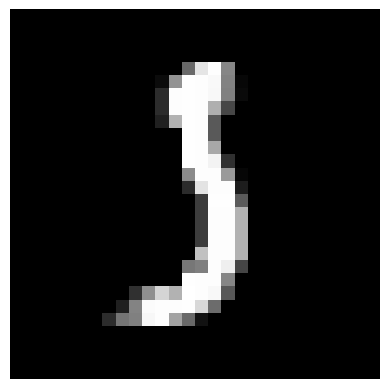

In [41]:
import matplotlib.pyplot as plt
figure = plt.figure()
plt.imshow(x_train[132], cmap='gray', vmin=0, vmax=1, interpolation='nearest')
print(f"Valor real: {y_train[132]}")
for i,v in enumerate(train_predictions[132]):
  print(f"% Predicción {i} = {v:.2f}")
plt.axis('off')


In [34]:
x_train_incorrect = x_train[incorrect_indices]
y_train_incorrect = y_train[incorrect_indices]
train_predicted_labels_incorrect = train_predictions_labels[incorrect_indices]
print(f"Predicciones incorrectas: {len(train_predicted_labels_incorrect)}")
print(f"Predicciones incorrectas: {(train_predicted_labels_incorrect)}")
print(f"Verdaderos valores label: {(y_train_incorrect)}")

Predicciones incorrectas: 341
Predicciones incorrectas: [1 1 1 6 4 0 1 4 0 0 6 5 6 1 4 4 4 1 7 0 1 1 6 4 1 1 6 8 0 3 4 0 8 8 1 0 0
 6 6 6 1 1 1 0 4 5 0 4 1 4 1 3 0 1 4 0 7 7 4 1 1 1 6 7 6 0 0 8 4 5 9 8 1 2
 4 4 4 4 6 3 1 4 1 4 4 1 4 6 6 1 1 4 5 1 6 1 0 4 2 1 0 1 3 6 8 8 1 1 6 8 1
 1 5 1 0 0 4 1 0 0 1 8 6 4 1 1 1 1 4 1 8 1 4 0 6 1 7 4 6 4 4 3 1 1 7 6 3 4
 6 4 6 4 1 4 1 4 8 9 6 6 1 4 1 1 6 2 8 8 6 7 3 0 3 6 6 1 3 4 8 4 1 0 1 7 6
 0 8 1 1 1 8 4 8 8 6 4 9 6 8 1 4 4 4 1 0 3 4 4 4 1 0 1 6 8 1 1 1 1 6 4 1 8
 2 4 1 0 6 3 9 8 5 6 1 1 4 1 1 7 8 3 1 7 4 4 4 8 8 4 4 1 3 1 6 8 1 1 1 4 4
 6 1 0 4 1 1 8 1 1 1 1 8 0 0 1 1 1 3 2 6 4 4 4 5 8 6 1 3 4 4 1 4 1 4 4 6 9
 7 4 6 4 1 2 6 4 1 6 9 0 4 9 1 1 1 4 8 1 4 4 8 4 8 4 4 1 5 1 9 1 4 6 9 1 4
 3 0 1 3 8 1 0 7]
Verdaderos valores label: [5 7 7 8 9 6 8 9 9 7 8 9 5 6 6 9 9 7 3 3 9 7 5 9 7 2 5 0 8 2 9 9 7 1 7 3 3
 5 5 5 5 7 7 1 7 3 8 9 2 9 2 5 6 2 9 8 2 2 6 7 2 7 5 9 5 1 1 4 9 9 3 9 7 7
 9 9 9 8 8 5 7 9 4 9 9 7 2 8 5 8 3 9 9 9 5 7 9 9 7 4 8 9 5 5 9 9 7 7 5 5 9


<Axes: ylabel='Count'>

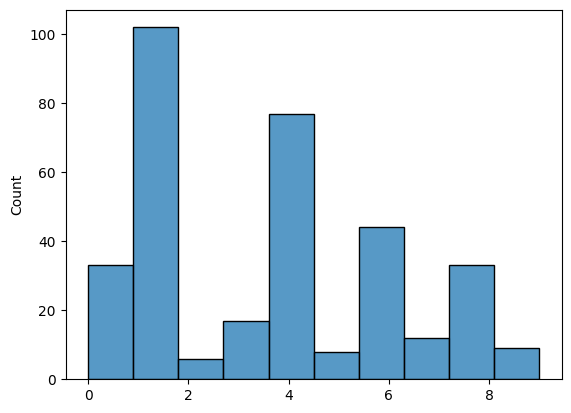

In [23]:
# Histograma de predicciones incorrectas
import seaborn as sns
sns.histplot(train_predicted_labels_incorrect)

In [26]:
# Mostrar algunos items mal predecidos
x_train_incorrect.shape

(341, 28, 28)

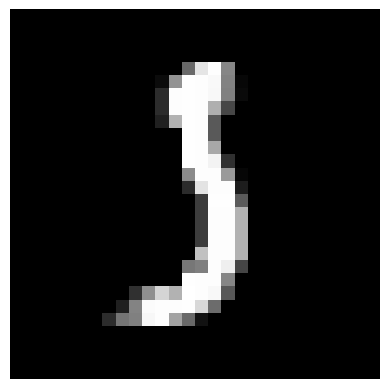

In [47]:
figure = plt.figure()
plt.imshow(x_train_incorrect[0], cmap='gray', vmin=0, vmax=1, interpolation='nearest')
plt.axis('off')
plt.show()

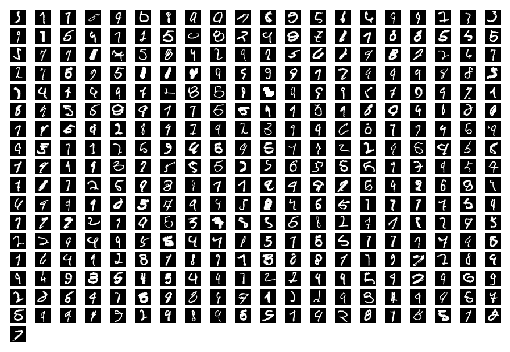

In [50]:
figure = plt.figure()
for i in range(341):
  figure.add_subplot(20,20,i+1)
  plt.imshow(x_train_incorrect[i], cmap='gray', vmin=0, vmax=1, interpolation='nearest')
  plt.axis('off')
plt.show()

In [32]:
341/60000*100

0.5683333333333334